# Correlation Analysis & Assumption Testing

This notebook examines relationships between selected features and
tests whether apparent behavioral differences translate into
meaningful statistical relationships.

The goal is to identify misleading correlations and validate (or
invalidate) intuitive assumptions before any modeling.


## Why Correlation Requires Caution in Security Data

In security datasets:
- High correlation does not imply detectability
- Correlation can be driven by shared volume effects
- Rare events distort linear measures

This analysis is exploratory and diagnostic, not prescriptive.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")


In [3]:
data1 = pd.read_csv(r"D:\MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv")
data2 = pd.read_csv(r"D:\MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv")
data3 = pd.read_csv(r"D:\MachineLearningCVE\Wednesday-workingHours.pcap_ISCX.csv")
data4 = pd.read_csv(r"D:\MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
data5 = pd.read_csv(r"D:\MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
data6 = pd.read_csv(r"D:\MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv")
data7 = pd.read_csv(r"D:\MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
data8 = pd.read_csv(r"D:\MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

data = pd.concat(
    [data1, data2, data3, data4, data5, data6, data7, data8],
    ignore_index=True
)


In [4]:
# Remove leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

In [5]:
missing_counts = data.isna().sum()
missing_counts[missing_counts > 0]

Flow Bytes/s    1358
dtype: int64

In [6]:
data_before = data.shape[0]
data.dropna(inplace=True)
data_after = data.shape[0]

print(f"Rows before: {data_before}")
print(f"Rows after: {data_after}")

Rows before: 2830743
Rows after: 2829385


In [7]:
dup_before = data.shape[0]
data.drop_duplicates(inplace=True)
dup_after = data.shape[0]

print(f"Rows before duplicate removal: {dup_before}")
print(f"Rows after duplicate removal: {dup_after}")

Rows before duplicate removal: 2829385
Rows after duplicate removal: 2522009


In [8]:
print("Final cleaned dataset shape:", data.shape)

Final cleaned dataset shape: (2522009, 79)


In [9]:
label_col = 'Label'
normal_data = data[data[label_col] == 'BENIGN']
attack_data = data[data[label_col] != 'BENIGN']


In [10]:
features = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Flow Bytes/s'
]


In [11]:
corr_matrix = data[features].corr(method='pearson')
corr_matrix


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Flow Bytes/s
Flow Duration,1.000000,0.020570,0.019389,0.063507,-0.024982
Total Fwd Packets,0.020570,1.000000,0.999070,0.365510,0.000391
Total Backward Packets,0.019389,0.999070,1.000000,0.359457,0.000335
Total Length of Fwd Packets,0.063507,0.365510,0.359457,1.000000,0.002270
Flow Bytes/s,-0.024982,0.000391,0.000335,0.002270,1.000000


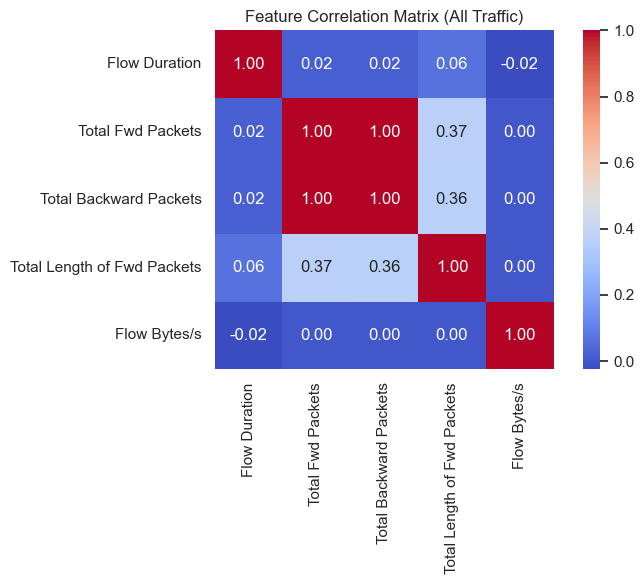

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Feature Correlation Matrix (All Traffic)")
plt.tight_layout()
plt.show()

## Initial Correlation Observations

Some features exhibit moderate to strong correlation, particularly
those related to traffic volume and packet counts.

These relationships may reflect shared underlying behavior rather than
independent signal.


In [13]:
corr_normal = normal_data[features].corr()
corr_attack = attack_data[features].corr()


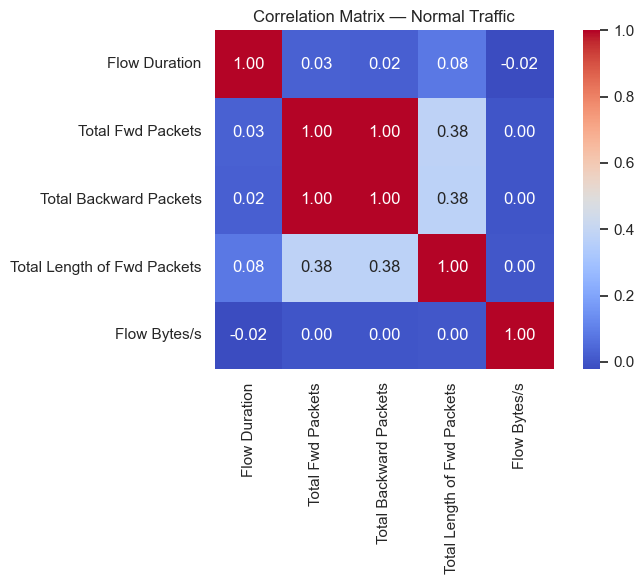

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_normal, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix — Normal Traffic")
plt.tight_layout()
plt.show()


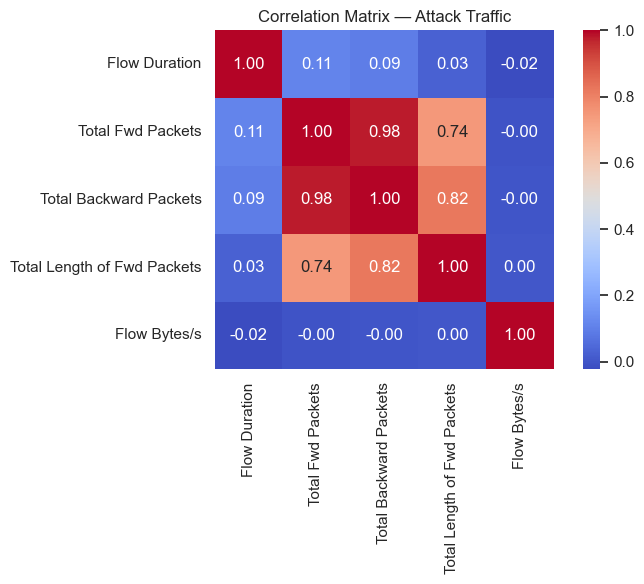

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_attack, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix — Attack Traffic")
plt.tight_layout()
plt.show()


## Assumption Testing

Several intuitive assumptions are tested:

- That features separating visually will show strong correlation differences
- That attack traffic introduces new independent relationships
- That correlation strength implies usefulness for detection

Results indicate that many correlations are driven by shared scale and
volume effects rather than meaningful discriminative signal.


## Misleading Correlations

High correlation between certain features does not guarantee
usefulness for intrusion detection.

Features with strong correlation may:
- Encode redundant information
- Inflate model confidence
- Reduce generalization under distribution shift


## Summary — Correlation Insights
Correlation analysis revealed:
- Strong relationships among volume-related features
- Similar correlation structure across normal and attack traffic
- Limited evidence that correlation alone explains attack behavior

These findings reinforce the need for cautious, multi-dimensional
feature reasoning in later stages.